<a href="https://colab.research.google.com/github/Viksilio/DA_plus/blob/master/SQL_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [ ]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [ ]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [ ]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [ ]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [ ]:
# напишите запрос
query = '''
SELECT DATE_TRUNC('MONTH', creation_date::date) :: date AS month_date,
       SUM(views_count) AS total_views
       
FROM stackoverflow.posts
WHERE DATE_TRUNC('YEAR', creation_date::date) = '2008-01-01'
GROUP BY DATE_TRUNC('MONTH', creation_date::date) :: date
ORDER BY 2 DESC
'''

# выполните запрос
sum_views_2008 = pd.read_sql_query(query, con=engine) 
sum_views_2008

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

В сентябре месяца виден значимый рост просмотров постов, который постепенно снижается вплоть до декабря месяца.  
Наименьшее количество просмотров постов было в июле месяце.  
Можно предположить, что в сентябре месяце был написан очень популярный пост, который привел к росту просмотров

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [ ]:
# напишите запрос
query = '''
SELECT  u.display_name,
        COUNT(DISTINCT user_id) AS active_users
FROM stackoverflow.users u
JOIN stackoverflow.posts p ON u.id=p.user_id
JOIN stackoverflow.post_types AS pt ON pt.id=p.post_type_id
WHERE DATE_TRUNC('day', p.creation_date) >= DATE_TRUNC('day', u.creation_date)
        AND DATE_TRUNC('day', p.creation_date) <= DATE_TRUNC('day', u.creation_date) + INTERVAL '1 month' 
        AND pt.type = 'Answer'
GROUP BY 1
HAVING COUNT(*) > 100
ORDER BY 1;
'''

# выполните запрос

pss = pd.read_sql_query(query, con=engine)
pss

,display_name,active_users
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


Какие аномалии наблюдаются в данных? О чём они говорят?

Имя пользователя не является уникальным. Осуществлять поиск пользователя по этому атрибуту будет некорректно.

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [ ]:
# напишите запрос
query = '''
SELECT DATE_TRUNC('month', ps.creation_date)::date AS month,
       COUNT(*)
FROM stackoverflow.posts ps
WHERE user_id IN (SELECT DISTINCT u.id
     FROM stackoverflow.users u
     JOIN stackoverflow.posts p ON u.id = p.user_id
     WHERE DATE_TRUNC('month', u.creation_date) = '2008-09-01'
       AND DATE_TRUNC('month', p.creation_date) = '2008-12-01')
GROUP BY month
ORDER BY 1 DESC
'''

# выполните запрос
pss = pd.read_sql_query(query, con=engine)
pss

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

Аномалиями являются посты за август месяц, таак как пользователи пришли в сервис в сентябре месяца.  
Основную активность пользователи проявляют спустя месяц после регистрации, о чем и говорит количество постов за октябрь месяц

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [ ]:
# напишите запрос
query = '''
SELECT p.user_id, p.creation_date, p.views_count,
       SUM(p.views_count) OVER (PARTITION BY p.user_id ORDER BY p.creation_date) as cumulative_count
FROM stackoverflow.posts p
ORDER BY p.user_id
'''

# выполните запрос
axn = pd.read_sql_query(query, con=engine)
axn

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [ ]:
# напишите запрос
query = '''
WITH tab1 AS
            (SELECT user_id,
              DATE_TRUNC('day', creation_date) AS day,
              COUNT(DATE_TRUNC('day', creation_date)) AS posts_count
               FROM stackoverflow.posts
               WHERE DATE_TRUNC('day', creation_date) >= '2008-08-01'
                    AND DATE_TRUNC('day', creation_date) <= '2008-08-31'
                   AND user_id IN 
                                 (SELECT user_id
                                    FROM stackoverflow.posts
                                    WHERE DATE_TRUNC('day', creation_date) >= '2008-08-01'
                                     AND DATE_TRUNC('day', creation_date) <= '2008-08-31'
                                    GROUP BY user_id
                                    HAVING COUNT(user_id) > 120)
                GROUP BY user_id, day)
SELECT user_id, AVG(posts_count) AS avg_daily
FROM tab1
GROUP BY user_id
ORDER BY 2
'''

# выполните запрос
posts_per_day = pd.read_sql_query(query, con=engine)
posts_per_day

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [ ]:
# напишите запрос
query = '''
WITH cnss as (select p.user_id,
       date_trunc('day', p.creation_date)
FROM stackoverflow.posts p
where p.creation_date between '2008-12-01' and '2008-12-07'
GROUP BY p.user_id, date_trunc('day', p.creation_date)),
nss as (select count(cnss.user_id) as pmt
        FROM cnss
        GROUP BY cnss.user_id)
SELECT ROUND(AVG(pmt))
FROM nss
'''

# выполните запрос
lopk = pd.read_sql_query(query, con=engine)
lopk

,round
0,2.0


Проанализируйте итоговую таблицу — какие выводы можно сделать?

В период с 1 по 7 декабря пользователи взаимодействовали с платформой в средней 2 дня. Можно предположить, что в выходные дни пользователи больше пользуются платформой.

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [ ]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date,
       CASE EXTRACT('month' FROM LAG(creation_date, 2) OVER (PARTITION BY user_id ORDER BY creation_date)) 
           WHEN 1 THEN 'January'
           WHEN 2 THEN 'February'
           WHEN 3 THEN 'March'
           WHEN 4 THEN 'April'
           WHEN 5 THEN 'May'
           WHEN 6 THEN 'June'
           WHEN 7 THEN 'July'
           WHEN 8 THEN 'August'
           WHEN 9 THEN 'September'
           WHEN 10 THEN 'October'
           WHEN 11 THEN 'November'
           WHEN 12 THEN 'December'
           ELSE NULL
       END AS second_last_month
FROM stackoverflow.posts
ORDER BY 1,
         2
'''

# выполните запрос
activity_history = pd.read_sql_query(query, con=engine)
activity_history

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [ ]:
# напишите запрос
query = '''
WITH first_post AS
(SELECT DISTINCT user_id,
        FIRST_VALUE(DATE_TRUNC('MONTH', creation_date)) OVER(PARTITION BY user_id ORDER BY creation_date) AS cohort_dt
FROM stackoverflow.posts),
 
profile AS
(SELECT user_id,
        cohort_dt,
        COUNT(*) OVER(PARTITION BY cohort_dt) AS cohort_users_cnt
 FROM first_post),
 
sessions AS 
(SELECT user_id,
        DATE_TRUNC('MONTH', creation_date) AS session_date
FROM stackoverflow.posts
GROUP BY 1, 2)
 
 
SELECT p.cohort_dt,
       session_date,
       COUNT(p.user_id) AS users_cnt,
       cohort_users_cnt,
       ROUND(COUNT(p.user_id) * 100.0 / cohort_users_cnt, 2) AS retention_rate
FROM profile p
JOIN sessions s ON p.user_id = s.user_id
GROUP BY 1,
         2,
         4
ORDER BY 1, 2
'''

# выполните запрос

r_rate = pd.read_sql_query(query, con=engine)
r_rate

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

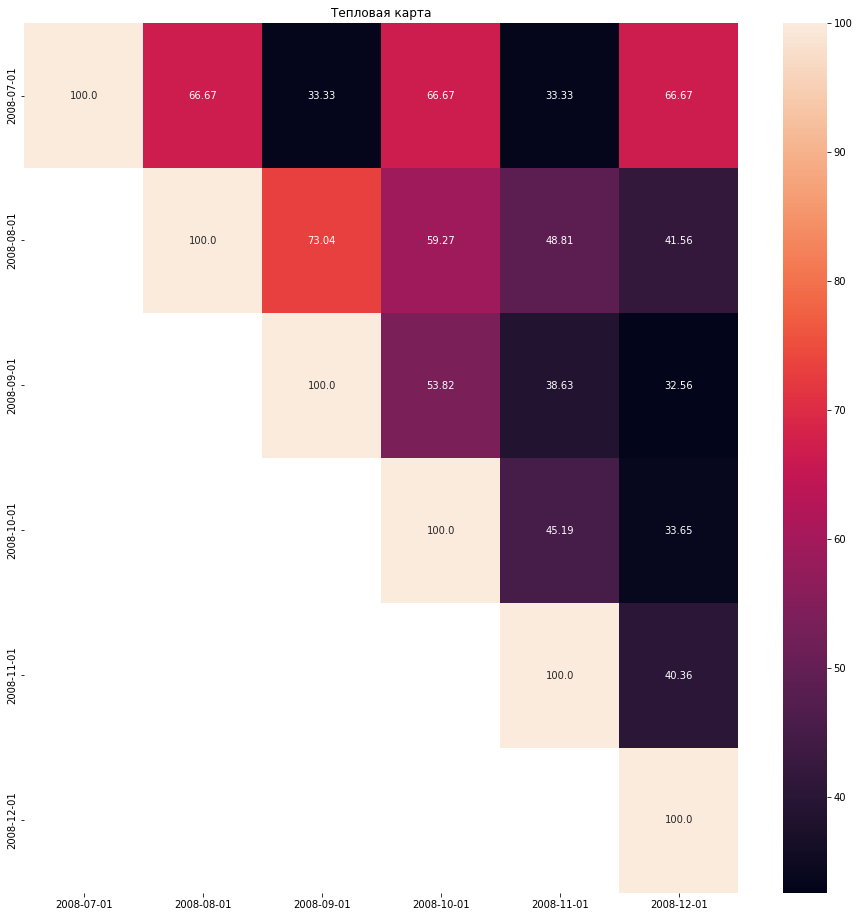

In [ ]:
# создаём сводную таблицу с результатами
retention = r_rate.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

# строим хитмэп
plt.figure(figsize=(16, 16)) # задаём размер графика
sns.heatmap(retention, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Тепловая карта') # название графика
plt.show()

Пользователи из когорты 2008-07-01 имеют малую выборку из-за чего данные Retention Rate некорректны.  
Пользователи из когорты 2008-08-01 имеют наибольший уровень удержания.  
В целом видно постепенное снижение retention rate с августа до декабря включительно.

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [ ]:
# напишите запрос
query = '''
WITH lol as (SELECT DISTINCT EXTRACT(month from date_trunc('month', p.creation_date)::date) as creation_month,
       COUNT(p.id) OVER (PARTITION BY DATE_TRUNC('month', p.creation_date)::date) as posts_count
FROM stackoverflow.posts p
WHERE p.creation_date::date between '2008-09-01' and '2008-12-31'),
apk as (SELECT lol.creation_month,
       lol.posts_count,
       lag(lol.posts_count) OVER () AS prv
FROM lol)

SELECT apk.creation_month, apk.posts_count, ROUND(((apk.posts_count::numeric/apk.prv::numeric)-1)*100, 2) as percentage
FROM apk
'''

# выполните запрос
p_view = pd.read_sql_query(query, con=engine)
p_view

,creation_month,posts_count,percentage
0,9.0,70371,NaN
1,10.0,63102,-10.33
2,11.0,46975,-25.56
3,12.0,44592,-5.07


Постройте круговую диаграмму с количеством постов по месяцам.

In [ ]:
# постройте круговую диаграмму с количеством постов по месяцам
fig = go.Figure(data=[go.Pie(labels=p_view['creation_month'],
                             values=p_view['posts_count'],
                             text=p_view['posts_count'].map("{:}".format),
                             textinfo='label+text',
                             hoverinfo='label+percent')])
fig.update_layout(title='Количество постов по месяцам',
                  width=700,
                  height=500,
                 showlegend=True,
                 title_x=0.5)
fig.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [ ]:
# напишите запрос
query = '''
WITH top_user as (SELECT p.user_id as user_id,
        COUNT(p.id) as cnt
FROM stackoverflow.posts p
GROUP BY 1
ORDER BY 2 dESC
LIMIT 1),

october_activ as (
SELECT extract('week' from date_trunc('week', p.creation_date)) as week_creation,
       p.creation_date
FROM stackoverflow.posts p
WHERE p.user_id in (select top_user.user_id from top_user)
and p.creation_date between '2008-10-01 00:00:00' and '2008-10-31 23:59:59')

select DISTINCT october_activ.week_creation, 
        LAST_value(october_activ.creation_date) OVER (PARTITION BY october_activ.week_creation)
from october_activ
ORDER BY october_activ.week_creation

'''

# выполните запрос
week_actitvy = pd.read_sql_query(query, con=engine)
week_actitvy

,week_creation,last_value
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01
